## Index
1. Libraries
2. Data Sets
3. Data Wrangling
4. Data Cleaning
5. Choropleth Map
6. Observations

## 01 Libraries

In [3]:
# Importing analytical and visualization libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import scipy
import os
import folium
import json

In [4]:
# This command prompts matplotlib visuals to appear in the notebook 

%matplotlib inline

## 02 Data Sets

In [6]:
# creating path for file upload

path=r'/Users/konstant/Documents/Achievement 6 - Advanced Analytics and Dashboard design'

In [7]:
# now uploading JSON file with world countries 

with open('/Users/konstant/Documents/Achievement 6 - Advanced Analytics and Dashboard design/02 Data/Original Data/world-countries.json') as f:
    world_geo = json.load(f)

In [8]:
# Checking the JSON data file

f = open(r'/Users/konstant/Documents/Achievement 6 - Advanced Analytics and Dashboard design/02 Data/Original Data/world-countries.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'name': 'Afghanistan'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[61.210817, 35.650072], [62.230651, 35.270664], [62.984662, 35.404041], [63.193538, 35.857166], [63.982896, 36.007957], [64.546479, 36.312073], [64.746105, 37.111818], [65.588948, 37.305217], [65.745631, 37.661164], [66.217385, 37.39379], [66.518607, 37.362784], [67.075782, 37.356144], [67.83, 37.144994], [68.135562, 37.023115], [68.859446, 37.344336], [69.196273, 37.151144], [69.518785, 37.608997], [70.116578, 37.588223], [70.270574, 37.735165], [70.376304, 38.138396], [70.806821, 38.486282], [71.348131, 38.258905], [71.239404, 37.953265], [71.541918, 37.905774], [71.448693, 37.065645], [71.844638, 36.738171], [72.193041, 36.948288], [72.63689, 37.047558], [73.260056, 37.495257], [73.948696, 37.421566], [74.980002, 37.41999], [75.158028, 37.133031], [74.575893, 37.020841], [74.067552, 36.836176], [72.920025, 36.720007], [71.846292, 36.509942], [71.262348, 36.074388], [71.498768,

In [9]:
# Now uploading the data set

df_prepared= pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'global_food_wastage_prepared.csv'), index_col = False)

In [10]:
# checking the data fram columns
df_prepared.head()

,Unnamed: 0,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,0,Argentina,2018,Bakery Items,72290.69,71749.94,60.3725,528.2025,59.035000
1,1,Argentina,2018,Beverages,127249.21,128791.57,131.8000,525.7825,37.177500
2,2,Argentina,2018,Dairy Products,28971.41,25935.06,94.5000,680.0200,54.286667
3,3,Argentina,2018,Frozen Food,78925.33,87757.40,123.7800,991.5350,62.292500
4,4,Argentina,2018,Grains & Cereals,152731.27,156398.00,122.7050,676.5950,53.573333


## 03 Data Wrangling

In [12]:
# Dropping the unnamed column

df_prepared=df_prepared.drop(columns = ['Unnamed: 0'])

In [13]:
df_prepared.head()

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,Argentina,2018,Bakery Items,72290.69,71749.94,60.3725,528.2025,59.035000
1,Argentina,2018,Beverages,127249.21,128791.57,131.8000,525.7825,37.177500
2,Argentina,2018,Dairy Products,28971.41,25935.06,94.5000,680.0200,54.286667
3,Argentina,2018,Frozen Food,78925.33,87757.40,123.7800,991.5350,62.292500
4,Argentina,2018,Grains & Cereals,152731.27,156398.00,122.7050,676.5950,53.573333


## 04 Data Consistency Checks

### Missing values

In [16]:
# Firtsly checking for missing values:
df_prepared.isnull().sum()

Country                      0
Year                         0
Food Category                0
Total Waste (Tons)           0
Economic Loss (Million $)    0
Avg Waste per Capita (Kg)    0
Population (Million)         0
Household Waste (%)          0
dtype: int64

In [17]:
# now checking for duplicated values
dups = df_prepared.duplicated()

# no results indicated no duplicates found.

In [18]:
dups.shape

(1106,)

### Extreme Values

In [20]:
# Now checking for extreme values that might skew the plot

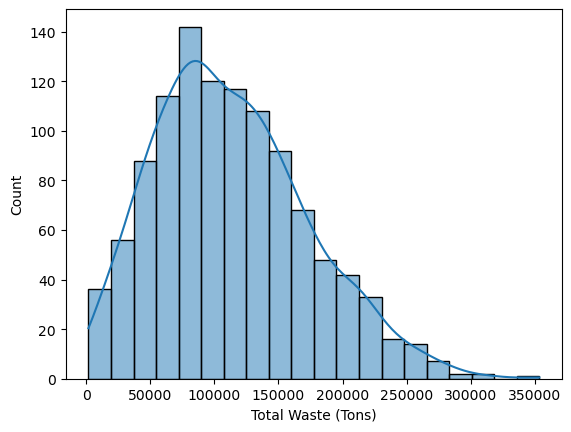

In [21]:
# Variable: 'Total Waste (Tons)'

sns.histplot(df_prepared['Total Waste (Tons)'], bins=20, kde = True)
plt.show()

# No extreme values found

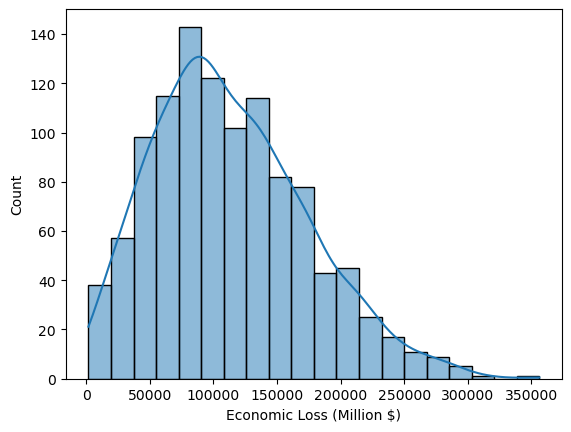

In [22]:
# Variable: 'Economic Loss (Million $)'

sns.histplot(df_prepared['Economic Loss (Million $)'], bins=20, kde = True)
plt.show()

# No extreme values found

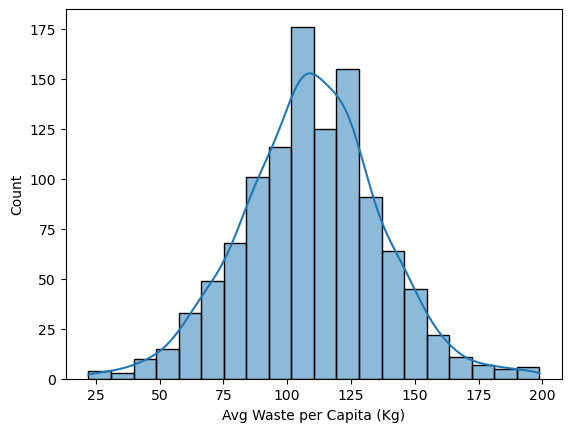

In [23]:
# Variable: ' Avg Waste per Capita (Kg)'

sns.histplot(df_prepared['Avg Waste per Capita (Kg)'], bins=20, kde = True)
plt.show()

# No extreme values found

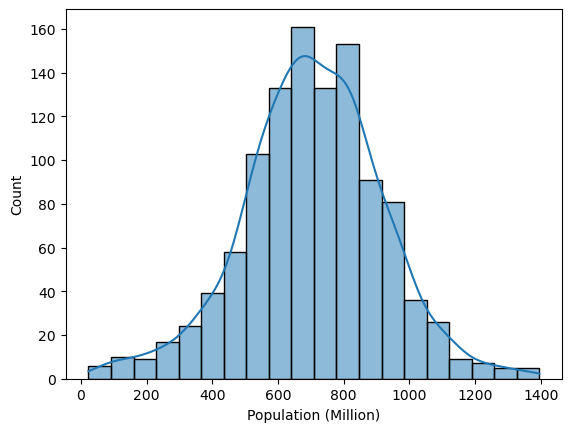

In [24]:
# Variable: 'Population (Million)'

sns.histplot(df_prepared['Population (Million)'], bins=20, kde = True)
plt.show()

# No extreme values found

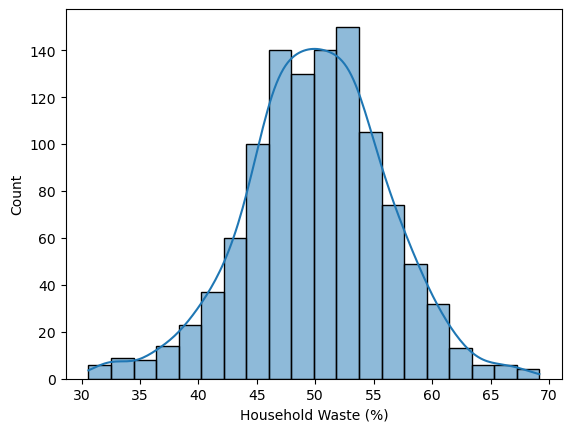

In [25]:
# Variable: 'Household Waste (%)'

sns.histplot(df_prepared['Household Waste (%)'], bins=20, kde = True)
plt.show()

# No extreme values found

## 05 Choropleth Map

In [27]:
# Create a data frame with just the variables to be plotted:
# Country 
# Total Waste (Tons) 

data_to_plot = df_prepared[['Country','Total Waste (Tons)']]
data_to_plot.head()

,Country,Total Waste (Tons)
0,Argentina,72290.69
1,Argentina,127249.21
2,Argentina,28971.41
3,Argentina,78925.33
4,Argentina,152731.27


In [28]:
# Settin up a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

In [29]:
# Now running the code for the choropleth map

folium.Choropleth(
    geo_data = world_geo, 
    data = data_to_plot,
    columns = ['Country','Total Waste (Tons)'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = 'Total Waste (Tons)').add_to(map)
folium.LayerControl().add_to(map)

map

## 06 Observation 
- From the choropleth map we can easily identify which countries contribute most to food waste: Türkiye and Mexico.
- Other high-waste countries include Brazil, Germany and Australia.
- Countries with Moderate foo waste include India, China and Indonesia
- Low food wasters includes Russia, Saudi Arabia, France, Canada and Argentina
- This answers one of the main questions that there is a difference in food wastage between countries.
- No data exists for the countries coloured in dark grey. 